# Simple and Multiple Linear Regression with Medical Costs Dataset

### **Objective**

- Perform **Exploratory Data Analysis (EDA)** on the medical costs dataset.
- Implement **Simple Linear Regression** and interpret results.
- Extend to **Multiple Linear Regression** and compare models.
- Evaluate regression models using **R² and residual analysis**.
- Check the **5 Assumptions of Linear Regression**.
- Briefly introduce **regularization** as a future topic.

## **Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## **Load and Explore the Medical Costs Dataset**

In [2]:
# Load dataset
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

# Display first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Exploratory Data Analysis (EDA)**

In [3]:
# Check for missing values and data types
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

### **Understanding Our Data: Data Types and Variables**
From the output of `df.info()`, we can see that our dataset consists of **both numerical and categorical variables**:

- **Numerical Variables (int/float):**
  - `age`: Age of the individual.
  - `bmi`: Body Mass Index, a measure of body fat based on height and weight.
  - `children`: Number of children/dependents.
  - `charges`: Medical insurance cost (our target variable).

- **Categorical Variables (object):**
  - `sex`: Male or Female.
  - `smoker`: Yes or No.
  - `region`: One of four geographical regions.

#### **Why Do Categorical Variables Matter?**
Linear regression requires **numerical inputs**, but we have categorical variables (`sex`, `smoker`, `region`). If we ignore these, we might **lose valuable information** that could improve our model.

#### **How Can We Use Categorical Data in Regression?**
We can use **one-hot encoding** to convert categorical variables into **binary (0/1) variables**, allowing us to include them in regression.

- For example, `smoker` (Yes/No) becomes:
  - `smoker_yes = 1` if the person smokes.
  - `smoker_yes = 0` if the person does not smoke.

- For `region` (Northwest, Southwest, Northeast, Southeast), we create **three binary columns** (`drop_first=True` avoids redundancy):
  - `region_northwest = 1` if in Northwest, else `0`.
  - `region_southeast = 1` if in Southeast, else `0`.
  - `region_southwest = 1` if in Southwest, else `0`.

#### **Why is This Okay for Linear Regression?**
Unlike continuous variables (e.g., `bmi`), one-hot encoded categorical variables are **binary** (0 or 1). This means:
- The regression model interprets them as **on/off switches** rather than numerical scales.
- The **slope coefficient** tells us the expected change in `charges` when switching from 0 → 1 (e.g., from non-smoker to smoker), **holding all else constant**.
- This does **not** violate linear regression assumptions because we are **not treating categories as ordered numbers** (e.g., we don't assign `male = 1, female = 2`, which would incorrectly imply ranking).








In [4]:
# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Convert Boolean values to integer (1/0)
df_encoded = df_encoded.astype(int)

df_encoded.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
5,31,25,0,3756,0,0,0,1,0
6,46,33,1,8240,0,0,0,1,0
7,37,27,3,7281,0,0,1,0,0
8,37,29,2,6406,1,0,0,0,0
9,60,25,0,28923,0,0,1,0,0


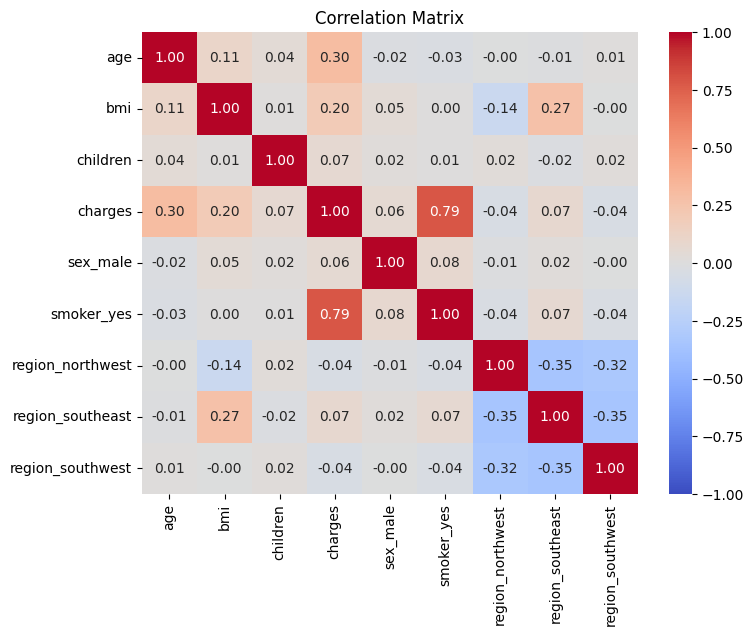

In [5]:
# Visualizing correlations
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## **Simple Linear Regression: Predicting Charges with BMI**

In [6]:
# Define independent (X) and dependent (y) variables
X = df_encoded[['age']]
y = df_encoded['charges']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test data
y_pred = lin_reg.predict(X_test)

# Compute R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Simple Linear Regression R²: {r2:.4f}')
print(f'Simple Linear Regression RMSE: {rmse:.2f}')

Simple Linear Regression R²: 0.1241
Simple Linear Regression RMSE: 11661.20


### Another Pass at Simple Linear Regression

Re-run a **simple linear regression model** with the variable you think would be more predictive than age alone.

In [8]:
# Define independent (X) and dependent (y) variables
# Add the single variable you believe will be more predictive than age
X = df_encoded[['smoker_yes']]
y = df_encoded['charges']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test data
y_pred = lin_reg.predict(X_test)

# Compute R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Simple Linear Regression R²: {r2:.4f}')
print(f'Simple Linear Regression RMSE: {rmse:.2f}')

Simple Linear Regression R²: 0.6602
Simple Linear Regression RMSE: 7262.62


## **Multiple Linear Regression**

In [9]:

# Define X and y for multiple regression
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multiple Linear Regression model
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)

# Predict on test data
y_pred_multi = multi_reg.predict(X_test)

# Compute R²
r2_multi = r2_score(y_test, y_pred_multi)

print(f'Multiple Linear Regression R²: {r2_multi:.4f}')

Multiple Linear Regression R²: 0.7838


## **Why Regularization Might Be Needed**

If we see multicollinearity among our predictor variables, then we may need to apply regularization. Let's explore the relationships among our predictors.

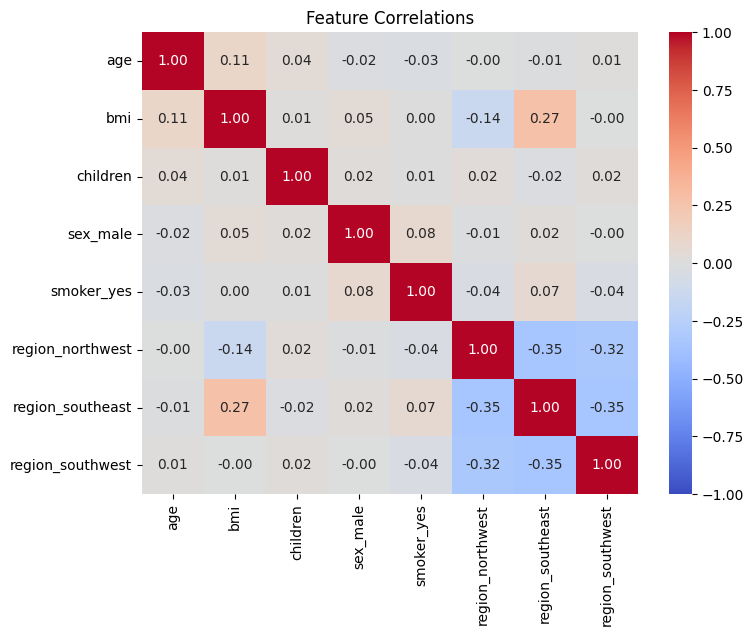

In [10]:
# Compute correlation matrix for multiple regression model
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Feature Correlations')
plt.show()

There don't seem to be any super high pairwise correlations. Let's explore the VIF which will regress each single predictor variable against all other predictor variables.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            Feature        VIF
0               age   7.635389
1               bmi  11.231286
2          children   1.808632
3          sex_male   2.002017
4        smoker_yes   1.260650
5  region_northwest   1.886371
6  region_southeast   2.266486
7  region_southwest   1.959754


#### **High VIF values for `bmi`**

There is a high inflation value for `bmi`.

Let's manually regress `bmi` on all other independent variables to see how well the other predictor variables explain `bmi`.



In [12]:
import statsmodels.api as sm

# Define X (all variables except bmi)
X_other = X.drop(columns=['bmi'])
X_other = sm.add_constant(X_other)  # Add intercept term

# Define y (bmi as dependent variable)
y_bmi = X['bmi']

# Fit regression model
model = sm.OLS(y_bmi, X_other).fit()

# Print R² value
print(f"R² for predicting bmi: {model.rsquared:.4f}")

R² for predicting bmi: 0.0974


#### **High VIF Values for `bmi`**

We did not see a high correlation for `bmi` with any *single* variable in the correlation matrix. However, we observe a **high VIF value (11.23) for `bmi`**, indicating that it may still suffer from **multicollinearity** when considering **all predictors together**.

### **Why Does This Happen?**
- The correlation matrix only shows **pairwise relationships** between two variables at a time.
- **VIF measures how well a variable is predicted by *all* other independent variables together**.
- Even if `bmi` is only **moderately correlated with multiple predictors**, these weak dependencies can **add up**, making `bmi` redundant in the model.

### **How Do We Interpret This?**
1. **`bmi` has VIF > 10**, meaning it is strongly collinear with other predictors.
2. However, our manual regression of `bmi` on all other independent variables gave **R² = 0.0974**, meaning other predictors do *not* explain `bmi` well.
3. This suggests **the high VIF is not due to one strong correlation, but rather weak correlations across multiple variables.**
4. **Multicollinearity does not necessarily mean we should remove `bmi`**—instead, we check its **p-value** in the regression model to see if it contributes useful information.

### **Next Step**
- Let's re-rerun the model without `bmi` to see if it is an important predictor by comparing the R² before and after** removing `bmi`


In [13]:

# Original model with all predictors
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred_multi = multi_reg.predict(X_test)
r2_multi = r2_score(y_test, y_pred_multi)

# Model without bmi
X_train_no_bmi = X_train.drop(columns=['bmi'])
X_test_no_bmi = X_test.drop(columns=['bmi'])

multi_reg_no_bmi = LinearRegression()
multi_reg_no_bmi.fit(X_train_no_bmi, y_train)
y_pred_no_bmi = multi_reg_no_bmi.predict(X_test_no_bmi)
r2_no_bmi = r2_score(y_test, y_pred_no_bmi)

# Compare results
print(f'Original Model R² (with bmi): {r2_multi:.4f}')
print(f'New Model R² (without bmi): {r2_no_bmi:.4f}')


Original Model R² (with bmi): 0.7838
New Model R² (without bmi): 0.7570


#### **Interpreting the Results**

Here we are asking, was there a significant drop in R² when removing the `bmi` variable?

A good next question is: what is *significant*?

For this purpose, we will use an [F-test](https://en.wikipedia.org/wiki/F-test)

### **Assessing the Statistical Significance of R² Drop**
We've observed a decrease in R² from **0.7838 (with `bmi`)** to **0.7570 (without `bmi`)**, a drop of **2.68% (~0.027)**. While this tells us the model's predictive power changed, we need to determine if this change is **statistically significant**.

#### **How Do We Measure This?**
We use an **F-test for nested models**, which tests whether the reduction in model fit (due to removing a variable) is **statistically significant**.

#### **How Does the F-Test Work?**
- It compares the **Sum of Squared Errors (SSE)** for the full and reduced models.
- It calculates an **F-statistic**, which tells us whether the additional variable (`bmi`) significantly improves the model.
- We then compute a **p-value**—if **p < 0.05**, removing `bmi` significantly worsened the model, and we should keep it.



In [14]:
from scipy.stats import f

# Get Sum of Squared Errors (SSE) for both models
SSE_full = np.sum((y_test - y_pred_multi) ** 2)  # Full model (with bmi)
SSE_reduced = np.sum((y_test - y_pred_no_bmi) ** 2)  # Reduced model (without bmi)

# Compute degrees of freedom
n = len(y_test)  # Number of observations
p_full = X_train.shape[1]  # Number of predictors in full model
p_reduced = X_train_no_bmi.shape[1]  # Number of predictors in reduced model

# Compute F-statistic
df_num = p_full - p_reduced  # Degrees of freedom for numerator
df_den = n - p_full  # Degrees of freedom for denominator
F_stat = ((SSE_reduced - SSE_full) / df_num) / (SSE_full / df_den)

# Compute p-value
p_value = 1 - f.cdf(F_stat, df_num, df_den)

# Print results
print(f"F-statistic: {F_stat:.4f}")
print(f"p-value: {p_value:.4f}")


F-statistic: 32.2115
p-value: 0.0000


**Key Takeaway:**
When features are highly correlated, regularization techniques like **Ridge and Lasso regression** help prevent overfitting and improve model interpretability.